In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
bmi_data = pd.read_csv("C:\\Users\\rahul\\Desktop\\py+dy12\\project\\project2\\bmi_data.csv")

In [3]:
bmi_data

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5


In [4]:
bmi_data.shape

(500, 4)

In [5]:
bmi_data.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [6]:
bmi_data.tail()

,Gender,Height,Weight,Index
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5
499,Male,173,131,5


In [7]:
bmi_data.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


# Checking NA values

In [8]:
bmi_data.isna().sum()

Gender    0
Height    0
Weight    0
Index     0
dtype: int64

In [9]:
bmi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


In [10]:
bmi_data.corr()

,Height,Weight,Index
Height,1.000000,0.000446,-0.422223
Weight,0.000446,1.000000,0.804569
Index,-0.422223,0.804569,1.000000


In [11]:
bmi_data['Index'].value_counts()

5    198
4    130
2     69
3     68
1     22
0     13
Name: Index, dtype: int64

In [12]:
bmi_data['Gender'].value_counts()

Female    255
Male      245
Name: Gender, dtype: int64

In [13]:
bmi_data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [14]:
Height = bmi_data[bmi_data['Height']>180]

In [15]:
Height

,Gender,Height,Weight,Index
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
5,Male,189,104,3
10,Male,195,81,2
...,...,...,...,...
484,Female,188,115,4
487,Male,187,80,2
488,Male,198,136,4
492,Female,198,50,0


In [16]:
Index = bmi_data[bmi_data['Index']==2]

In [17]:
Index

,Gender,Height,Weight,Index
1,Male,189,87,2
10,Male,195,81,2
13,Male,155,51,2
14,Male,191,79,2
24,Female,172,67,2
...,...,...,...,...
472,Female,178,65,2
477,Male,167,64,2
478,Female,151,55,2
487,Male,187,80,2


In [18]:
colname=[]
for x in bmi_data.columns:
    if bmi_data[x].dtype=="object":
        colname.append(x)
colname

['Gender']

In [19]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for x in colname:
    bmi_data[x]=le.fit_transform(bmi_data[x])

In [20]:
bmi_data

,Gender,Height,Weight,Index
0,1,174,96,4
1,1,189,87,2
2,0,185,110,4
3,0,195,104,3
4,1,149,61,3
...,...,...,...,...
495,0,150,153,5
496,0,184,121,4
497,0,141,136,5
498,1,150,95,5


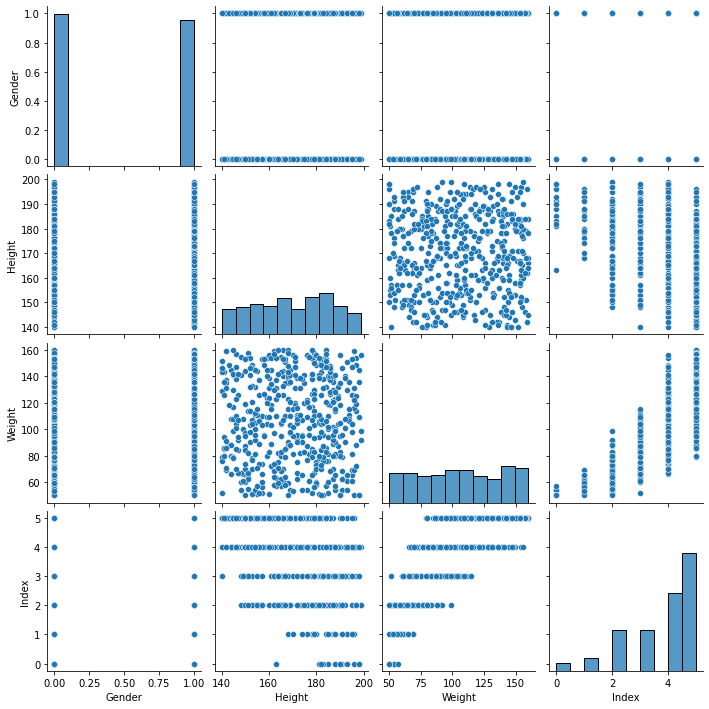

In [21]:
sns.pairplot(bmi_data)

Text(0.5, 1.0, 'BMI Correlation Heatmap')

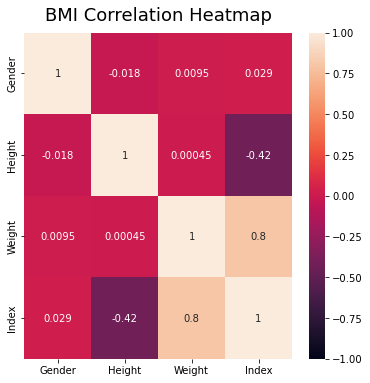

In [22]:
plt.figure(figsize = (6, 6))
heatmap = sns.heatmap(bmi_data.corr(), vmin = -1, vmax = 1, annot = True)
heatmap.set_title('BMI Correlation Heatmap', fontdict = {'fontsize' : 18}, pad = 12)

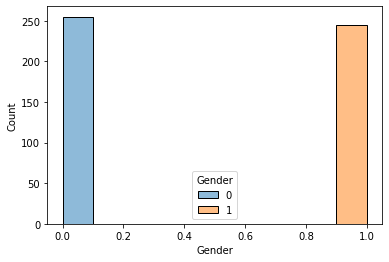

In [23]:
sns.histplot(data= bmi_data, x="Gender", hue="Gender")
plt.show()

<AxesSubplot:>

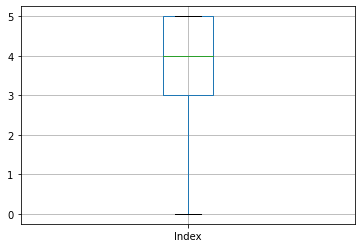

In [24]:
bmi_data.boxplot("Index")

In [25]:
x = bmi_data.iloc[:,:-1].values

In [26]:
x

array([[  1, 174,  96],
       [  1, 189,  87],
       [  0, 185, 110],
       ...,
       [  0, 141, 136],
       [  1, 150,  95],
       [  1, 173, 131]], dtype=int64)

In [27]:
y = bmi_data.iloc[:,3].values

In [28]:
y

array([4, 2, 4, 3, 3, 3, 5, 5, 3, 4, 2, 4, 3, 2, 2, 5, 5, 5, 5, 5, 5, 5,
       4, 5, 2, 3, 3, 1, 5, 5, 5, 1, 1, 5, 5, 4, 3, 4, 5, 2, 4, 5, 2, 5,
       4, 2, 4, 4, 3, 5, 5, 1, 5, 4, 4, 3, 4, 5, 3, 5, 0, 5, 0, 2, 5, 5,
       4, 2, 4, 4, 2, 4, 5, 2, 3, 4, 4, 4, 4, 0, 3, 5, 3, 4, 5, 0, 5, 5,
       5, 5, 5, 3, 3, 2, 4, 5, 4, 5, 1, 0, 4, 5, 5, 4, 4, 4, 5, 5, 4, 3,
       4, 5, 4, 2, 4, 3, 2, 5, 5, 5, 4, 4, 4, 5, 5, 4, 4, 4, 5, 2, 5, 2,
       5, 4, 5, 5, 5, 3, 5, 5, 2, 4, 5, 5, 5, 4, 3, 5, 3, 3, 0, 3, 3, 5,
       5, 4, 3, 5, 3, 4, 2, 2, 3, 5, 4, 2, 4, 5, 3, 2, 4, 5, 5, 4, 4, 4,
       4, 3, 5, 3, 3, 4, 4, 2, 3, 3, 5, 3, 5, 4, 5, 5, 4, 5, 5, 5, 4, 4,
       5, 5, 1, 3, 4, 4, 5, 4, 5, 4, 3, 4, 4, 5, 5, 5, 0, 5, 5, 5, 5, 5,
       2, 5, 4, 5, 0, 5, 3, 4, 5, 5, 4, 2, 3, 3, 4, 3, 5, 5, 2, 5, 3, 2,
       1, 5, 0, 5, 3, 5, 3, 4, 3, 5, 5, 5, 5, 2, 4, 5, 5, 4, 5, 5, 5, 2,
       4, 5, 5, 5, 5, 1, 5, 5, 4, 0, 3, 3, 4, 2, 3, 1, 1, 5, 5, 4, 4, 4,
       4, 5, 2, 5, 4, 3, 3, 4, 5, 5, 2, 4, 3, 4, 5,

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.20, random_state=0)

In [30]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(400, 3)
(100, 3)
(400,)
(100,)


In [31]:
X_train

array([[  1, 159, 154],
       [  0, 167, 153],
       [  1, 178, 117],
       ...,
       [  0, 146, 104],
       [  1, 181, 111],
       [  1, 167, 151]], dtype=int64)

In [32]:
X_test

array([[  0, 178, 154],
       [  1, 183, 147],
       [  1, 166, 107],
       [  1, 159, 140],
       [  1, 152, 132],
       [  0, 153, 107],
       [  1, 188,  99],
       [  0, 179, 150],
       [  1, 181, 105],
       [  0, 168, 140],
       [  1, 166,  61],
       [  1, 153,  70],
       [  0, 167,  58],
       [  1, 149, 100],
       [  1, 174, 138],
       [  0, 185, 102],
       [  1, 161, 115],
       [  1, 174,  90],
       [  0, 155, 111],
       [  1, 144,  80],
       [  0, 150,  87],
       [  0, 185,  94],
       [  1, 178,  85],
       [  0, 181, 106],
       [  1, 185,  76],
       [  1, 188,  65],
       [  0, 153, 149],
       [  0, 186, 127],
       [  1, 142,  69],
       [  0, 177,  81],
       [  0, 153,  77],
       [  1, 144, 108],
       [  0, 158, 149],
       [  1, 154, 100],
       [  1, 174,  95],
       [  0, 198,  50],
       [  0, 180, 156],
       [  0, 172,  90],
       [  1, 184, 153],
       [  0, 174,  65],
       [  1, 153, 104],
       [  0, 188

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
X_train

array([[ 1.05131497, -0.63012682,  1.49496019],
       [-0.95118973, -0.14165642,  1.46416643],
       [ 1.05131497,  0.52999039,  0.35559097],
       ...,
       [-0.95118973, -1.42389123, -0.04472794],
       [ 1.05131497,  0.71316679,  0.1708284 ],
       [ 1.05131497, -0.14165642,  1.40257891]])

In [35]:
X_test

array([[-0.95118973,  0.52999039,  1.49496019],
       [ 1.05131497,  0.83528439,  1.27940385],
       [ 1.05131497, -0.20271522,  0.04765335],
       [ 1.05131497, -0.63012682,  1.06384752],
       [ 1.05131497, -1.05753842,  0.81749741],
       [-0.95118973, -0.99647962,  0.04765335],
       [ 1.05131497,  1.14057839, -0.19869675],
       [-0.95118973,  0.59104919,  1.37178514],
       [ 1.05131497,  0.71316679, -0.01393418],
       [-0.95118973, -0.08059762,  1.06384752],
       [ 1.05131497, -0.20271522, -1.36885974],
       [ 1.05131497, -0.99647962, -1.09171587],
       [-0.95118973, -0.14165642, -1.46124102],
       [ 1.05131497, -1.24071483, -0.16790299],
       [ 1.05131497,  0.28575519,  1.00225999],
       [-0.95118973,  0.95740199, -0.10631547],
       [ 1.05131497, -0.50800922,  0.29400345],
       [ 1.05131497,  0.28575519, -0.47584062],
       [-0.95118973, -0.87436202,  0.1708284 ],
       [ 1.05131497, -1.54600883, -0.78377824],
       [-0.95118973, -1.17965603, -0.568

# LogisticRegression

In [36]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [37]:
y_pred = classifier.predict(X_test)

In [38]:
y_pred


array([5, 5, 4, 5, 5, 5, 3, 5, 4, 5, 2, 4, 2, 5, 5, 4, 5, 4, 5, 5, 4, 3,
       3, 4, 2, 2, 5, 4, 4, 2, 4, 5, 5, 5, 4, 1, 5, 4, 5, 2, 5, 4, 4, 5,
       4, 3, 5, 2, 5, 5, 4, 4, 3, 5, 5, 3, 4, 4, 1, 4, 4, 4, 4, 2, 4, 4,
       2, 3, 5, 4, 5, 5, 4, 4, 4, 5, 5, 4, 5, 5, 4, 3, 4, 5, 5, 2, 5, 5,
       5, 4, 3, 2, 3, 1, 3, 2, 4, 4, 2, 3], dtype=int64)

In [39]:
from sklearn.metrics import classification_report,confusion_matrix
print('classification report',classification_report(Y_test,y_pred))

classification report               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.33      0.25      0.29         4
           2       0.62      0.80      0.70        10
           3       0.83      0.67      0.74        15
           4       0.86      0.94      0.90        32
           5       0.95      0.97      0.96        36

    accuracy                           0.84       100
   macro avg       0.60      0.60      0.60       100
weighted avg       0.81      0.84      0.82       100



C:\Users\rahul\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rahul\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rahul\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# DecisionTreeClassifier

In [40]:
from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(X_train, Y_train)  

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [41]:
y_pred = classifier.predict(X_test)

In [42]:
from sklearn.metrics import classification_report,confusion_matrix
print('classification report',classification_report(Y_test,y_pred))

classification report               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      0.50      0.67         4
           2       0.69      0.90      0.78        10
           3       0.75      0.80      0.77        15
           4       0.82      0.72      0.77        32
           5       0.87      0.92      0.89        36

    accuracy                           0.82       100
   macro avg       0.86      0.81      0.81       100
weighted avg       0.83      0.82      0.82       100



# RandomForestClassifier

In [43]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=200, criterion='entropy', random_state=0)
classifier.fit(X_train, Y_train)


RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=0)

In [44]:
y_pred = classifier.predict(X_test)

In [45]:
from sklearn.metrics import classification_report,confusion_matrix
print('classification report',classification_report(Y_test,y_pred))

classification report               precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.75      0.75      0.75         4
           2       0.75      0.90      0.82        10
           3       0.92      0.80      0.86        15
           4       0.91      0.91      0.91        32
           5       0.95      0.97      0.96        36

    accuracy                           0.90       100
   macro avg       0.88      0.83      0.85       100
weighted avg       0.90      0.90      0.90       100



# KNN(K-Nearest Neighbors)

In [46]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train,Y_train)

KNeighborsClassifier()

In [47]:
y_pred = classifier.predict(X_test)

In [48]:
from sklearn.metrics import classification_report,confusion_matrix
print('classification report',classification_report(Y_test,y_pred))

classification report               precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       0.50      0.50      0.50         4
           2       0.75      0.90      0.82        10
           3       0.92      0.80      0.86        15
           4       0.94      0.94      0.94        32
           5       0.95      0.97      0.96        36

    accuracy                           0.89       100
   macro avg       0.76      0.74      0.75       100
weighted avg       0.89      0.89      0.89       100



In [49]:
print('confusion_matrix',confusion_matrix(Y_test,y_pred))

confusion_matrix [[ 1  2  0  0  0  0]
 [ 1  2  1  0  0  0]
 [ 0  0  9  1  0  0]
 [ 0  0  2 12  1  0]
 [ 0  0  0  0 30  2]
 [ 0  0  0  0  1 35]]


In [50]:
cm = confusion_matrix(Y_test,y_pred)

In [51]:
cm

array([[ 1,  2,  0,  0,  0,  0],
       [ 1,  2,  1,  0,  0,  0],
       [ 0,  0,  9,  1,  0,  0],
       [ 0,  0,  2, 12,  1,  0],
       [ 0,  0,  0,  0, 30,  2],
       [ 0,  0,  0,  0,  1, 35]], dtype=int64)

In [52]:
final_data= pd.DataFrame(data=cm, index=['Extremely Weak','Weak','Normal','Overweight','Obesity','Extreme Obesity'],\
                         columns=['Extremely Weak','Weak','Normal','Overweight','Obesity','Extreme Obesity'])

In [53]:
final_data

,Extremely Weak,Weak,Normal,Overweight,Obesity,Extreme Obesity
Extremely Weak,1,2,0,0,0,0
Weak,1,2,1,0,0,0
Normal,0,0,9,1,0,0
Overweight,0,0,2,12,1,0
Obesity,0,0,0,0,30,2
Extreme Obesity,0,0,0,0,1,35
